[[    6.50418    -1.80127     0.      ...    -0.00001     0.
     -0.00001]
 [   -1.80127    11.01671    -1.94537 ...     0.         -0.00002
      0.     ]
 [    0.         -1.94537    18.53759 ...    -0.00003     0.
     -0.00002]
 ...
 [   -0.00001     0.         -0.00003 ... 14451.1103     -2.02637
      0.     ]
 [    0.         -0.00002     0.      ...    -2.02637 14747.43305
     -2.02637]
 [   -0.00001     0.         -0.00002 ...     0.         -2.02637
  15046.76416]] 

[  5.83645  11.18131  18.66339  29.14508  42.65646  59.18721  78.73204
 101.28842 126.85507 155.43128]


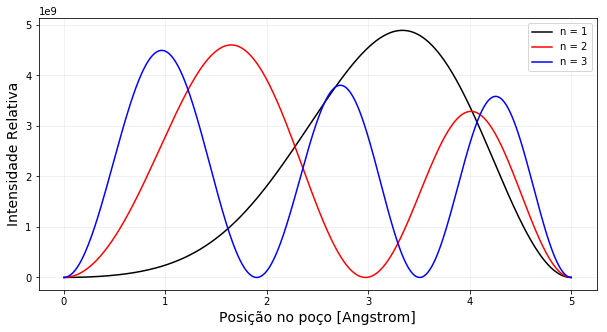

A norma do estado n = 0 é igual a: 1.0000
A norma do estado n = 1 é igual a: 1.0000
A norma do estado n = 2 é igual a: 1.0000


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integ

############################################################
#--Este programa calcula os autovalores e autovetores------#
#--de um Hamiltoniano para uma particula presa em um-------#
#--poço de potencial V(x) = ax/L com barreiras infinitas.--#
#--Uma solução de superposição de ondas planas é-----------#
#--assumido para o problemas e o Hamiltoniano toma a forma-#
#--de uma matriz. A solução do problema é normalizada.-----#
############################################################

# a: Parâmetro de energia para o poço
# L: Largura do poço

a = 10         #[eV]
L = 5e-10      #[m]

# Esta função calcula os elementos H_mn da matrix do Hamiltoniano 
def H_mn(m,n,a,L):
    h_bar = 1.0546e-34 #[Js]
    M     = 9.1094e-31 #[kg]
    q     = 1.6022e-19 #[C]
    
    if m == n:
        Hmn = (a*q)/2 + (h_bar*n*np.pi/L)**2/(2*M)
        return Hmn/q
    
    if m!=n and (m+n)%2 != 0:
        Hmn = (-8*a*q*m*n)/(np.pi*(m**2 - n**2))**2
        return Hmn/q 
    
    else: 
        return 0

# N: Dimensão do Hamiltoniano [N x N]
N = 100
H = [[H_mn(m,n,a,L) for m in range(1, N+1)] for n in range(1, N+1)]

# w: Autovalores 
# v: autovetores
w,v = np.linalg.eigh(H)

# Imprimindo a matriz H e seus 10 primeiros autovalores;
# Os valores são impressos com 5 casas decimais em notação científica;
np.set_printoptions(suppress = True)
np.set_printoptions(precision = 5)
print(np.matrix(H),'\n')
print(w[:10])

# Autovetor associado para cada nivel energetico:
# 0: Estado Fundamental
# 1 e 2: Dois primeiros estados excitados
phi_1 = v[0]
phi_2 = v[1]
phi_3 = v[2]

x = np.linspace(0, L, 500)

# Função que entrega a densidade de probabilidade do estado;
# Ela recebe um array com valores de x e outro com valores de ϕ_n;
# A função de onda é dada por Ψ = Σ ϕ_n*sin(nπx/L);
# A função de onda é normalizada;
def Psi_sq_norm(x, phi, L):
    Psi = np.zeros(len(x), dtype = float)    
    for n in range(len(phi)):
        Psi_n = phi[n]*np.sin((n+1)*np.pi*x/L)
        Psi  += Psi_n
    
    norm     = integ.trapz(Psi**2, x)**0.5
    Psi_norm = Psi/norm
    return Psi_norm**2

Psi_1 = Psi_sq_norm(x, phi_1, L)
Psi_2 = Psi_sq_norm(x, phi_2, L)
Psi_3 = Psi_sq_norm(x, phi_3, L)

plt.figure(figsize = (10,5))

# Gráfico das densidades de probabilidade
plt.plot(x*1e10, Psi_1, '-k', label = 'n = 1')
plt.plot(x*1e10, Psi_2, '-r', label = 'n = 2')
plt.plot(x*1e10, Psi_3, '-b', label = 'n = 3')

# Embelezamento das fíguras
plt.xlabel('Posição no poço [Angstrom]', size = 14)
plt.ylabel('Intensidade Relativa', size = 14)
plt.legend(loc = 'best')
plt.grid(alpha = 0.2)

plt.savefig('im_6_9b', dpi = 300)
plt.show()

# Verificação da norma de cada estado
norm = [0,0,0]
norm[0] = integ.trapz(Psi_1, x)
norm[1] = integ.trapz(Psi_2, x)
norm[2] = integ.trapz(Psi_3, x)

for i in range(3):
    print('A norma do estado n = %d é igual a: %.4f' %(i, norm[i]))